# Quant Finance - Clase 1

## Web Scraping de la pagina de RAVA

Modulos necesarios

Codigo.data_byma (en github) ;

Codigo.utils_opciones_byma (en github)

bs4,

requests,

pandas,

matplotlib,

datetime,

calendar,

sys,

Instalarlos con Anaconda, comando Conda o comando pip install

### Importo los modulos

In [1]:
import sys
sys.path.append('..')
#Para poder leer los modulos dentro del directorio 
from Codigo.data_byma import *
from Codigo.utils_opciones_byma import *

### Metodo para el web scraping

In [2]:
panel_rava = web_scraping_opciones_rava()
panel_rava.head(20)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRC12.0AG,2.000,0.50,1.990,1.900,1.900,3.000,15:33,100.0,20267.0
1,ALUC13.9AG,28.600,0.00,28.600,28.600,28.600,28.600,11:17,3.0,8580.0
2,ALUC13.9OC,30.000,1.69,29.500,30.000,29.800,30.350,16:02,897.0,2705480.0
3,ALUC27.0AG,16.000,0.00,16.000,16.001,16.000,16.001,16:12,3.0,4800.0
4,ALUC31.0OC,14.300,5.93,13.500,14.500,14.300,15.000,15:48,55.0,82260.0
5,ALUC35.0AG,7.900,-15.69,9.370,7.950,7.900,9.900,15:13,67.0,54962.0
6,ALUC37.0AG,6.450,-0.12,6.458,6.400,5.900,6.580,16:51,173.0,108338.0
7,ALUC37.0OC,9.499,35.64,7.003,8.000,8.000,9.499,16:03,3.0,2550.0
8,ALUC39.0AG,5.999,114.25,2.800,6.500,5.999,6.500,16:40,5.0,3200.0
9,ALUC41.0AG,3.385,14.36,2.960,2.960,2.950,3.500,16:50,752.0,260670.0


### Que hace internamente el metodo??

#### 1) Beautiful Soup y otros imports

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

#### 2) Como usamos BeautifulSoup y requests

In [4]:
url = 'http://www.rava.com/precios/panel.php?m=OPC'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')


In [5]:
# En soup voy a encontrar el codigo html de la pagina
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="rava,ravaonline,rava bursatil,rava sociedad de bolsa,bolsa,bursátil,bursatil,sociedad,acciones,bonos,merval,internet,operar,online,indice" name="keywords"/>
<meta content="Rava Bursátil" property="og:site_name"/>
<meta content="http://www.rava.com/precios/panel.php?m=OPC" property="og:url"/>
<meta content="Cotizaciones" name="title"/>
<meta content="Cotizaciones" property="og:title"/>
<meta content="Cotizaciones" name="twitter:title"/>
<title>Rava Bursátil - Cotizaciones</title>
<meta content="Información y asesoramiento personalizado para operar en los mercados locales e internacionales. Más de 60 años de trayectoria. Agente BYMA, MAE, ROFEX y MAV. Operamos acciones, bonos y opciones del mercado loca

In [6]:
# En opciones tengo el contenido de la tabla correspondiente
opciones_html = soup.find('table', {'class': 'tablapanel2'})

opciones_html

<table align="center" border="0" cellpadding="4" cellspacing="0" class="tablapanel2" width="100%">
<tr align="right" class="cabecerapanel">
<td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efe

In [7]:
# Filas ya va ordenando cada una de las opciones
filas = opciones_html.find_all('tr')
filas

[<tr align="right" class="cabecerapanel">
 <td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>
 <td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efectivo</a></td>
 </tr>,
 <tr class="ci">
 <td align="left" class="c1 b"><a href="/empresa

#### 3) Como extraemos la informacion

In [8]:
tr = filas[0]
tr

<tr align="right" class="cabecerapanel">
<td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>
<td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>
<td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efectivo</a></td>
</tr>

In [9]:
td = tr.find_all('td')
td


[<td align="left"><a href="/precios/panel.php?m=OPC&amp;o=especie&amp;t=d">Especie</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=ultimo&amp;t=d">Último</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=variacion&amp;t=d">% Día</a></td>,
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=anterior&amp;t=d">Anterior</a></td>,
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=apertura&amp;t=d">Apertura</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=minimo&amp;t=d">Mínimo</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=maximo&amp;t=d">Máximo</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=hora&amp;t=d">Hora</a></td>,
 <td class="movil_hide_cell"><a href="/precios/panel.php?m=OPC&amp;o=volnominal&amp;t=d">Vol. Nominal</a></td>,
 <td><a href="/precios/panel.php?m=OPC&amp;o=volefectivo&amp;t=d">Vol. Efectivo</a></td>]

In [10]:
row = [tr.text for tr in td]
row

['Especie',
 'Último',
 '% Día',
 'Anterior',
 'Apertura',
 'Mínimo',
 'Máximo',
 'Hora',
 'Vol. Nominal',
 'Vol. Efectivo']

In [11]:
# inicializo una lista vacia, alli voy a ir poniendo el contenido de cada fila
l = []
l.append(row)

l

[['Especie',
  'Último',
  '% Día',
  'Anterior',
  'Apertura',
  'Mínimo',
  'Máximo',
  'Hora',
  'Vol. Nominal',
  'Vol. Efectivo']]

In [12]:
#Ahora si, voy linea por linea a por el contenido de cada fila (dejo la primera linea afuera del loop para que se vea)

tr = filas[1]
tr

<tr class="ci">
<td align="left" class="c1 b"><a href="/empresas/perfil.php?e=AGRC12.0AG">AGRC12.0AG</a></td>
<td class="c1">2,000</td>
<td class="c1 cg">0,50</td>
<td class="movil_hide_cell">1,990</td>
<td class="movil_hide_cell">1,900</td>
<td class="c1">1,900</td>
<td class="c1">3,000</td>
<td class="c1">15:33</td>
<td class="movil_hide_cell">100</td>
<td class="c1">20.267</td>
</tr>

In [13]:
td = tr.find_all('td')
row = [tr.text for tr in td]
row

['AGRC12.0AG',
 '2,000',
 '0,50',
 '1,990',
 '1,900',
 '1,900',
 '3,000',
 '15:33',
 '100',
 '20.267']

In [14]:
#Reemplazo ',' por '.' y paso el string a float
for index in [1,2,3,4,5,6,8,9]:
    row[index] = row[index].replace('.', '')
    row[index] = row[index].replace(',', '.')
    try:
        row[index] = float(row[index])
    except:
        #Si no encuentra valor pone -99.99
        row[index] = -99.99

l.append(row)
    
l
    
    

[['Especie',
  'Último',
  '% Día',
  'Anterior',
  'Apertura',
  'Mínimo',
  'Máximo',
  'Hora',
  'Vol. Nominal',
  'Vol. Efectivo'],
 ['AGRC12.0AG', 2.0, 0.5, 1.99, 1.9, 1.9, 3.0, '15:33', 100.0, 20267.0]]

In [15]:
#Ahora si, todas las filas
for tr in filas[2:]:
    td = tr.find_all('td')
    row = [tr.text for tr in td]

    #Reemplazo ',' por '.' y paso el string a float
    for index in [1,2,3,4,5,6,8,9]:
        row[index] = row[index].replace('.', '')
        row[index] = row[index].replace(',', '.')
        try:
            row[index] = float(row[index])
        except:
            #Si no encuentra valor pone -99.99
            row[index] = -99.99

    l.append(row)

In [16]:
# Como se ve l despues del ciclo?
l

[['Especie',
  'Último',
  '% Día',
  'Anterior',
  'Apertura',
  'Mínimo',
  'Máximo',
  'Hora',
  'Vol. Nominal',
  'Vol. Efectivo'],
 ['AGRC12.0AG', 2.0, 0.5, 1.99, 1.9, 1.9, 3.0, '15:33', 100.0, 20267.0],
 ['ALUC13.9AG', 28.6, 0.0, 28.6, 28.6, 28.6, 28.6, '11:17', 3.0, 8580.0],
 ['ALUC13.9OC',
  30.0,
  1.69,
  29.5,
  30.0,
  29.8,
  30.35,
  '16:02',
  897.0,
  2705480.0],
 ['ALUC27.0AG', 16.0, 0.0, 16.0, 16.001, 16.0, 16.001, '16:12', 3.0, 4800.0],
 ['ALUC31.0OC', 14.3, 5.93, 13.5, 14.5, 14.3, 15.0, '15:48', 55.0, 82260.0],
 ['ALUC35.0AG', 7.9, -15.69, 9.37, 7.95, 7.9, 9.9, '15:13', 67.0, 54962.0],
 ['ALUC37.0AG', 6.45, -0.12, 6.458, 6.4, 5.9, 6.58, '16:51', 173.0, 108338.0],
 ['ALUC37.0OC', 9.499, 35.64, 7.003, 8.0, 8.0, 9.499, '16:03', 3.0, 2550.0],
 ['ALUC39.0AG', 5.999, 114.25, 2.8, 6.5, 5.999, 6.5, '16:40', 5.0, 3200.0],
 ['ALUC41.0AG', 3.385, 14.36, 2.96, 2.96, 2.95, 3.5, '16:50', 752.0, 260670.0],
 ['ALUC41.0OC', 6.0, 7.14, 5.6, 5.8, 5.8, 6.4, '16:34', 7.0, 4240.0],
 ['AL

#### 4) Lo convierto en un DataFrame

In [17]:
panel_rava = pd.DataFrame(l[1:], columns=l[0])

panel_rava

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRC12.0AG,2.00,0.50,1.990,1.900,1.9,3.000,15:33,100.0,20267.0
1,ALUC13.9AG,28.60,0.00,28.600,28.600,28.6,28.600,11:17,3.0,8580.0
2,ALUC13.9OC,30.00,1.69,29.500,30.000,29.8,30.350,16:02,897.0,2705480.0
3,ALUC27.0AG,16.00,0.00,16.000,16.001,16.0,16.001,16:12,3.0,4800.0
4,ALUC31.0OC,14.30,5.93,13.500,14.500,14.3,15.000,15:48,55.0,82260.0
...,...,...,...,...,...,...,...,...,...,...
193,YPFC880.AG,15.00,-1.32,15.200,18.000,13.2,18.000,16:50,12.0,19000.0
194,YPFC960.AG,6.00,20.00,5.000,6.000,6.0,6.000,11:20,66.0,39600.0
195,YPFV580.AG,2.22,-17.78,2.700,2.000,2.0,2.220,15:19,11.0,2310.0
196,YPFV680.AG,12.80,-22.02,16.414,12.800,12.8,12.800,14:02,1.0,1280.0


## Panel acciones (bonus)

In [18]:
panel_acciones = obtener_panel_acciones()
panel_acciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo
0,AGRO,"14,400","8,68","13,250","13,300","13,300","14,600",11:41,455.498,6.458.129
1,AUSO,"61,100","6,63","57,300","56,000","56,000","62,300",11:42,42.134,2.545.850
2,BBAR,"179,450","-1,43","182,050","182,500","177,500","182,500",11:42,35.771,6.407.298
3,BHIP,"12,500","8,23","11,550","11,950","11,800","12,900",11:42,407.734,5.055.387
4,BOLT,"6,380","43,37","4,450","4,670","4,670","6,500",11:42,9.140.989,51.557.706
...,...,...,...,...,...,...,...,...,...,...
63,TGSU2,"141,100","-0,11","141,250","141,000","141,000","141,250",11:38,3.350,472.905
64,TRAN,"26,500","-1,67","26,950","26,900","26,100","27,350",11:40,64.777,1.719.561
65,TXAR,"38,050","-0,52","38,250","38,200","37,600","38,350",11:40,34.587,1.312.275
66,VALO,"25,950","0,97","25,700","25,800","25,750","26,000",11:41,130.638,3.378.380


## Del panel de Rava crudo a otro con informacion customizada

### Metodo para generar el panel customizado

In [19]:
panel_opciones_byma_all_raw = obtener_panel_opciones_byma(ticker = '', clean_flag = False)
panel_opciones_byma_all_raw

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC12.0AG,2.00,0.50,1.990,1.900,1.9,3.000,15:33,100.0,20267.0,AGR,AGRO,C,12.0,AG,8,2020-08-21,14.4,24,1.200000
1,ALUC13.9AG,28.60,0.00,28.600,28.600,28.6,28.600,11:17,3.0,8580.0,ALU,ALUA,C,13.9,AG,8,2020-08-21,42.5,24,3.057554
2,ALUC13.9OC,30.00,1.69,29.500,30.000,29.8,30.350,16:02,897.0,2705480.0,ALU,ALUA,C,13.9,OC,10,2020-10-16,42.5,80,3.057554
3,ALUC27.0AG,16.00,0.00,16.000,16.001,16.0,16.001,16:12,3.0,4800.0,ALU,ALUA,C,27.0,AG,8,2020-08-21,42.5,24,1.574074
4,ALUC31.0OC,14.30,5.93,13.500,14.500,14.3,15.000,15:48,55.0,82260.0,ALU,ALUA,C,31.0,OC,10,2020-10-16,42.5,80,1.370968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,YPFC880.AG,15.00,-1.32,15.200,18.000,13.2,18.000,16:50,12.0,19000.0,YPF,YPFD,C,880.0,AG,8,2020-08-21,763.0,24,0.867045
194,YPFC960.AG,6.00,20.00,5.000,6.000,6.0,6.000,11:20,66.0,39600.0,YPF,YPFD,C,960.0,AG,8,2020-08-21,763.0,24,0.794792
195,YPFV580.AG,2.22,-17.78,2.700,2.000,2.0,2.220,15:19,11.0,2310.0,YPF,YPFD,P,580.0,AG,8,2020-08-21,763.0,24,1.315517
196,YPFV680.AG,12.80,-22.02,16.414,12.800,12.8,12.800,14:02,1.0,1280.0,YPF,YPFD,P,680.0,AG,8,2020-08-21,763.0,24,1.122059


In [20]:
panel_opciones_byma_all_clean = obtener_panel_opciones_byma(ticker = '', clean_flag = True)
panel_opciones_byma_all_clean

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
0,AGRC12.0AG,AGRO,14.40,C,12.00,24,2.00,1.200000
1,ALUC13.9AG,ALUA,42.60,C,13.90,24,28.60,3.064748
2,ALUC27.0AG,ALUA,42.60,C,27.00,24,16.00,1.577778
3,ALUC35.0AG,ALUA,42.60,C,35.00,24,7.90,1.217143
4,ALUC37.0AG,ALUA,42.60,C,37.00,24,6.45,1.151351
...,...,...,...,...,...,...,...,...
193,COMC0.65DI,COME,2.78,C,0.65,143,2.28,4.276923
194,GFGV99.0DI,GGAL,148.70,P,99.00,143,3.00,1.502020
195,GFGC123.DI,GGAL,148.70,C,123.00,143,51.50,1.208943
196,GFGC160.DI,GGAL,148.70,C,160.00,143,27.50,0.929375


In [21]:
panel_opciones_byma_GGAL_clean = obtener_panel_opciones_byma('GGAL', True)
panel_opciones_byma_GGAL_clean

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
0,GFGC45.0AG,GGAL,148.7,C,45.0,24,102.001,3.304444
1,GFGV45.0AG,GGAL,148.7,P,45.0,24,0.113,3.304444
2,GFGC60.0AG,GGAL,148.7,C,60.0,24,91.000,2.478333
3,GFGV63.0AG,GGAL,148.7,P,63.0,24,0.170,2.360317
4,GFGC69.0AG,GGAL,148.7,C,69.0,24,82.000,2.155072
...,...,...,...,...,...,...,...,...
70,GFGC185.OC,GGAL,148.7,C,185.0,80,10.750,0.803784
71,GFGC200.OC,GGAL,148.7,C,200.0,80,6.500,0.743500
72,GFGV99.0DI,GGAL,148.7,P,99.0,143,3.000,1.502020
73,GFGC123.DI,GGAL,148.7,C,123.0,143,51.500,1.208943


### Que hace el metodo internamente?



#### 1) Levanta los paneles de opciones y de acciones y genera una copia del de opciones

In [22]:
panel_rava = web_scraping_opciones_rava()
#Obtengo el panel crudo de acciones (para el spot)
panel_acciones = obtener_panel_acciones()

#Genero el nuevo panel
panel_opciones = panel_rava.copy()


#### 2) Inicializo las columnas nuevas a agregar del Dataframe

In [23]:
#Le agrego las nuevas columnas (ojo con los tipos string, float, int, datetime)
panel_opciones['Ticker_Opcion'] = ''
panel_opciones['Ticker_Stock'] = ''
panel_opciones['Tipo'] = ''
panel_opciones['Strike'] = 0.0
panel_opciones['ExpiryMonthName'] = ''
panel_opciones['ExpiryMonthNumber'] = 0
panel_opciones['ExpiryDate'] = datetime.date.today()
panel_opciones['Spot'] = 0.0
panel_opciones['TTM'] = 0
panel_opciones['Moneyness'] = 0.0

panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC12.0AG,2.00,0.50,1.990,1.900,1.9,3.000,15:33,100.0,20267.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
1,ALUC13.9AG,28.60,0.00,28.600,28.600,28.6,28.600,11:17,3.0,8580.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
2,ALUC13.9OC,30.00,1.69,29.500,30.000,29.8,30.350,16:02,897.0,2705480.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
3,ALUC27.0AG,16.00,0.00,16.000,16.001,16.0,16.001,16:12,3.0,4800.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
4,ALUC31.0OC,14.30,5.93,13.500,14.500,14.3,15.000,15:48,55.0,82260.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,YPFC880.AG,15.00,-1.32,15.200,18.000,13.2,18.000,16:50,12.0,19000.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
194,YPFC960.AG,6.00,20.00,5.000,6.000,6.0,6.000,11:20,66.0,39600.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
195,YPFV580.AG,2.22,-17.78,2.700,2.000,2.0,2.220,15:19,11.0,2310.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
196,YPFV680.AG,12.80,-22.02,16.414,12.800,12.8,12.800,14:02,1.0,1280.0,,,,0.0,,0,2020-07-28,0.0,0,0.0


#### 3) Recorro fila por fila para llenar las nuevas columnas (1 ejemplo)

##### *) Desgloso la especie en ticker, strike, vencimiento y tipo

In [24]:
fila = 0


panel_opciones.Ticker_Opcion.values[fila] = panel_opciones.Especie.values[fila][0:3]

panel_opciones.Tipo.values[fila] = panel_opciones.Especie.values[fila][3:4]
panel_opciones.Strike.values[fila] = panel_opciones.Especie.values[fila][4:8]
panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.Especie.values[fila][8:10]

panel_opciones.head(2)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC12.0AG,2.0,0.5,1.99,1.9,1.9,3.0,15:33,100.0,20267.0,AGR,,C,12.0,AG,0,2020-07-28,0.0,0,0.0
1,ALUC13.9AG,28.6,0.0,28.60,28.6,28.6,28.6,11:17,3.0,8580.0,,,,0.0,,0,2020-07-28,0.0,0,0.0


##### *) Uno a uno voy generando lo necesario

In [25]:
panel_opciones.Ticker_Stock.values[fila] = conversor_ticker(panel_opciones.Ticker_Opcion.values[fila])

panel_opciones.Tipo.values[fila] = panel_opciones.Tipo.values[fila].replace('V', 'P')

panel_opciones.head(2)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC12.0AG,2.0,0.5,1.99,1.9,1.9,3.0,15:33,100.0,20267.0,AGR,AGRO,C,12.0,AG,0,2020-07-28,0.0,0,0.0
1,ALUC13.9AG,28.6,0.0,28.60,28.6,28.6,28.6,11:17,3.0,8580.0,,,,0.0,,0,2020-07-28,0.0,0,0.0


In [26]:
# Artilugio que lo tuve que usar NO RECUERDO POR QUE! :)

try:
    int(panel_opciones.ExpiryMonthName.values[fila][0])
    panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila] + int(panel_opciones.ExpiryMonthName.values[fila][0]))
    panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.ExpiryMonthName.values[fila][1]
except:
    panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila])
    
    

In [27]:
#conversor_ticker('AGR')

#panel_opciones.Especie.values[fila][0:3]

#panel_opciones.Ticker_Opcion.values[fila]\

#conversor_ticker(panel_opciones.Ticker_Opcion.values[fila])

#panel_opciones.Ticker_Stock.values[fila]



##### *) Obtengo el precio spot del ticker con un metodo interno y aprovechando el panel de acciones

In [28]:
panel_opciones.Spot.values[fila] = obtener_spot_ticker(panel_acciones, panel_opciones.Ticker_Stock.values[fila])

##### *) Obtengo el Time to maturity (en dias)

In [29]:
try:
    panel_opciones.ExpiryMonthNumber.values[fila] = mes_nombre_a_numero(panel_opciones.ExpiryMonthName.values[fila])
except:
    panel_opciones.ExpiryMonthNumber.values[fila] = 0

panel_opciones.ExpiryDate.values[fila] = fecha_expiracion(panel_opciones.ExpiryMonthNumber.values[fila])
hoy = datetime.date.today()
panel_opciones.TTM.values[fila] = (panel_opciones.ExpiryDate.values[fila] - hoy).days

panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC12.0AG,2.00,0.50,1.990,1.900,1.9,3.000,15:33,100.0,20267.0,AGR,AGRO,C,12.0,AG,8,2020-08-21,14.4,24,0.0
1,ALUC13.9AG,28.60,0.00,28.600,28.600,28.6,28.600,11:17,3.0,8580.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
2,ALUC13.9OC,30.00,1.69,29.500,30.000,29.8,30.350,16:02,897.0,2705480.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
3,ALUC27.0AG,16.00,0.00,16.000,16.001,16.0,16.001,16:12,3.0,4800.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
4,ALUC31.0OC,14.30,5.93,13.500,14.500,14.3,15.000,15:48,55.0,82260.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,YPFC880.AG,15.00,-1.32,15.200,18.000,13.2,18.000,16:50,12.0,19000.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
194,YPFC960.AG,6.00,20.00,5.000,6.000,6.0,6.000,11:20,66.0,39600.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
195,YPFV580.AG,2.22,-17.78,2.700,2.000,2.0,2.220,15:19,11.0,2310.0,,,,0.0,,0,2020-07-28,0.0,0,0.0
196,YPFV680.AG,12.80,-22.02,16.414,12.800,12.8,12.800,14:02,1.0,1280.0,,,,0.0,,0,2020-07-28,0.0,0,0.0


##### *) Por ultimo calculo el moneyness de valor informativo importante

In [30]:
panel_opciones.Moneyness.values[fila] = panel_opciones.Spot.values[fila] / panel_opciones.Strike.values[fila]

In [31]:
panel_opciones.head(2)

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC12.0AG,2.0,0.5,1.99,1.9,1.9,3.0,15:33,100.0,20267.0,AGR,AGRO,C,12.0,AG,8,2020-08-21,14.4,24,1.2
1,ALUC13.9AG,28.6,0.0,28.60,28.6,28.6,28.6,11:17,3.0,8580.0,,,,0.0,,0,2020-07-28,0.0,0,0.0


#### 3bis) Recorro fila por fila para llenar las nuevas columnas


In [32]:

for fila in range(1,len(panel_opciones.Especie.values)):
    panel_opciones.Ticker_Opcion.values[fila] = panel_opciones.Especie.values[fila][0:3]

    panel_opciones.Ticker_Stock.values[fila] = conversor_ticker(panel_opciones.Ticker_Opcion.values[fila])

    panel_opciones.Tipo.values[fila] = panel_opciones.Especie.values[fila][3:4]
    panel_opciones.Tipo.values[fila] = panel_opciones.Tipo.values[fila].replace('V', 'P')

    panel_opciones.Strike.values[fila] = panel_opciones.Especie.values[fila][4:8]

    panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.Especie.values[fila][8:10]

    try:
        int(panel_opciones.ExpiryMonthName.values[fila][0])
        panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila] + int(panel_opciones.ExpiryMonthName.values[fila][0]))
        panel_opciones.ExpiryMonthName.values[fila] = panel_opciones.ExpiryMonthName.values[fila][1]
    except:
        panel_opciones.Strike.values[fila] = float(panel_opciones.Strike.values[fila])

    try:
        panel_opciones.ExpiryMonthNumber.values[fila] = mes_nombre_a_numero(panel_opciones.ExpiryMonthName.values[fila])
    except:
        panel_opciones.ExpiryMonthNumber.values[fila] = 0

    panel_opciones.ExpiryDate.values[fila] = fecha_expiracion(panel_opciones.ExpiryMonthNumber.values[fila])


    panel_opciones.Spot.values[fila] = obtener_spot_ticker(panel_acciones, panel_opciones.Ticker_Stock.values[fila])


    hoy = datetime.date.today()
    panel_opciones.TTM.values[fila] = (panel_opciones.ExpiryDate.values[fila] - hoy).days

    panel_opciones.Moneyness.values[fila] = panel_opciones.Spot.values[fila] / panel_opciones.Strike.values[fila]



In [33]:
#Asi queda entonces el panel
panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
0,AGRC12.0AG,2.00,0.50,1.990,1.900,1.9,3.000,15:33,100.0,20267.0,AGR,AGRO,C,12.0,AG,8,2020-08-21,14.4,24,1.200000
1,ALUC13.9AG,28.60,0.00,28.600,28.600,28.6,28.600,11:17,3.0,8580.0,ALU,ALUA,C,13.9,AG,8,2020-08-21,42.6,24,3.064748
2,ALUC13.9OC,30.00,1.69,29.500,30.000,29.8,30.350,16:02,897.0,2705480.0,ALU,ALUA,C,13.9,OC,10,2020-10-16,42.6,80,3.064748
3,ALUC27.0AG,16.00,0.00,16.000,16.001,16.0,16.001,16:12,3.0,4800.0,ALU,ALUA,C,27.0,AG,8,2020-08-21,42.6,24,1.577778
4,ALUC31.0OC,14.30,5.93,13.500,14.500,14.3,15.000,15:48,55.0,82260.0,ALU,ALUA,C,31.0,OC,10,2020-10-16,42.6,80,1.374194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,YPFC880.AG,15.00,-1.32,15.200,18.000,13.2,18.000,16:50,12.0,19000.0,YPF,YPFD,C,880.0,AG,8,2020-08-21,763.0,24,0.867045
194,YPFC960.AG,6.00,20.00,5.000,6.000,6.0,6.000,11:20,66.0,39600.0,YPF,YPFD,C,960.0,AG,8,2020-08-21,763.0,24,0.794792
195,YPFV580.AG,2.22,-17.78,2.700,2.000,2.0,2.220,15:19,11.0,2310.0,YPF,YPFD,P,580.0,AG,8,2020-08-21,763.0,24,1.315517
196,YPFV680.AG,12.80,-22.02,16.414,12.800,12.8,12.800,14:02,1.0,1280.0,YPF,YPFD,P,680.0,AG,8,2020-08-21,763.0,24,1.122059


#### 4) Filtro por ticker


In [34]:
#Si se provee un ticker, se filtra por ticker, si no, se provee el panel completo

ticker = 'ALUA'

if ticker == '':
    pass
else:
    panel_opciones = panel_opciones[panel_opciones.Ticker_Stock == ticker]
    
panel_opciones

,Especie,Último,% Día,Anterior,Apertura,Mínimo,Máximo,Hora,Vol. Nominal,Vol. Efectivo,Ticker_Opcion,Ticker_Stock,Tipo,Strike,ExpiryMonthName,ExpiryMonthNumber,ExpiryDate,Spot,TTM,Moneyness
1,ALUC13.9AG,28.600,0.00,28.600,28.600,28.600,28.600,11:17,3.0,8580.0,ALU,ALUA,C,13.9,AG,8,2020-08-21,42.6,24,3.064748
2,ALUC13.9OC,30.000,1.69,29.500,30.000,29.800,30.350,16:02,897.0,2705480.0,ALU,ALUA,C,13.9,OC,10,2020-10-16,42.6,80,3.064748
3,ALUC27.0AG,16.000,0.00,16.000,16.001,16.000,16.001,16:12,3.0,4800.0,ALU,ALUA,C,27.0,AG,8,2020-08-21,42.6,24,1.577778
4,ALUC31.0OC,14.300,5.93,13.500,14.500,14.300,15.000,15:48,55.0,82260.0,ALU,ALUA,C,31.0,OC,10,2020-10-16,42.6,80,1.374194
5,ALUC35.0AG,7.900,-15.69,9.370,7.950,7.900,9.900,15:13,67.0,54962.0,ALU,ALUA,C,35.0,AG,8,2020-08-21,42.6,24,1.217143
6,ALUC37.0AG,6.450,-0.12,6.458,6.400,5.900,6.580,16:51,173.0,108338.0,ALU,ALUA,C,37.0,AG,8,2020-08-21,42.6,24,1.151351
7,ALUC37.0OC,9.499,35.64,7.003,8.000,8.000,9.499,16:03,3.0,2550.0,ALU,ALUA,C,37.0,OC,10,2020-10-16,42.6,80,1.151351
8,ALUC39.0AG,5.999,114.25,2.800,6.500,5.999,6.500,16:40,5.0,3200.0,ALU,ALUA,C,39.0,AG,8,2020-08-21,42.6,24,1.092308
9,ALUC41.0AG,3.385,14.36,2.960,2.960,2.950,3.500,16:50,752.0,260670.0,ALU,ALUA,C,41.0,AG,8,2020-08-21,42.6,24,1.039024
10,ALUC41.0OC,6.000,7.14,5.600,5.800,5.800,6.400,16:34,7.0,4240.0,ALU,ALUA,C,41.0,OC,10,2020-10-16,42.6,80,1.039024


#### 5) Panel limpio

In [35]:
panel_limpio = panel_opciones.copy()

clean_flag = True

# Panel limpio: cambio de nombre, reordenamiento y limpieza minima del panel
if clean_flag == True:
    # Sacar opciones sobre bonos
    panel_limpio = panel_limpio[~panel_limpio.Especie.str.contains('A24')]

    panel_limpio = panel_limpio[
            ['Especie', 'Ticker_Stock', 'Spot', 'Tipo', 'Strike', 'TTM', 'Último', 'Moneyness']]

    panel_limpio = panel_limpio.rename(
            columns={'Ticker_Stock': 'Ticker', 'Tipo': 'CallPut', 'Último': 'Last'}, inplace=False)

    panel_limpio = panel_limpio.sort_values(['TTM', 'Ticker', 'Strike', 'CallPut'])

    # Remover TTMs mayores de un año o negativos (por algun error)
    panel_limpio = panel_limpio[panel_limpio.TTM < 364]
    panel_limpio = panel_limpio[panel_limpio.TTM > 0]

    panel_limpio = panel_limpio.reset_index()
    del panel_limpio['index']
    
panel_limpio

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
0,ALUC13.9AG,ALUA,42.6,C,13.9,24,28.600,3.064748
1,ALUC27.0AG,ALUA,42.6,C,27.0,24,16.000,1.577778
2,ALUC35.0AG,ALUA,42.6,C,35.0,24,7.900,1.217143
3,ALUC37.0AG,ALUA,42.6,C,37.0,24,6.450,1.151351
4,ALUC39.0AG,ALUA,42.6,C,39.0,24,5.999,1.092308
5,ALUC41.0AG,ALUA,42.6,C,41.0,24,3.385,1.039024
6,ALUC45.0AG,ALUA,42.6,C,45.0,24,1.300,0.946667
7,ALUC13.9OC,ALUA,42.6,C,13.9,80,30.000,3.064748
8,ALUC31.0OC,ALUA,42.6,C,31.0,80,14.300,1.374194
9,ALUC37.0OC,ALUA,42.6,C,37.0,80,9.499,1.151351


## Ploteando los datos

### Para cada vencimiento, grafico los strikes

In [36]:
# BYMA


panel_opciones_ggal_byma_limpio = obtener_panel_opciones_byma('GGAL', True)

TTMs = list(set(panel_opciones_ggal_byma_limpio.TTM.values))
TTMs

[24, 80, 143]

In [37]:
# El proximo vencimiento (usualemtne mas liquido)
TTM = min(TTMs)

panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM)].head(20)

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness
0,GFGC45.0AG,GGAL,148.7,C,45.0,24,102.001,3.304444
1,GFGV45.0AG,GGAL,148.7,P,45.0,24,0.113,3.304444
2,GFGC60.0AG,GGAL,148.7,C,60.0,24,91.000,2.478333
3,GFGV63.0AG,GGAL,148.7,P,63.0,24,0.170,2.360317
4,GFGC69.0AG,GGAL,148.7,C,69.0,24,82.000,2.155072
5,GFGC81.0AG,GGAL,148.7,C,81.0,24,72.000,1.835802
6,GFGV81.0AG,GGAL,148.7,P,81.0,24,0.200,1.835802
7,GFGC84.0AG,GGAL,148.7,C,84.0,24,67.500,1.770238
8,GFGV84.0AG,GGAL,148.7,P,84.0,24,0.240,1.770238
9,GFGC90.0AG,GGAL,148.7,C,90.0,24,57.000,1.652222


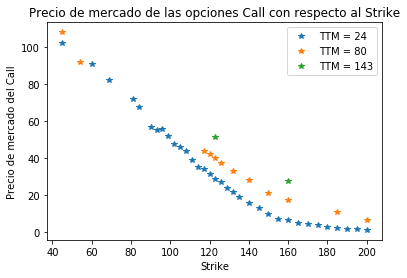

In [38]:
from matplotlib import pyplot as plt
CP = "C"
for TTM in TTMs:
    Ks = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()
    

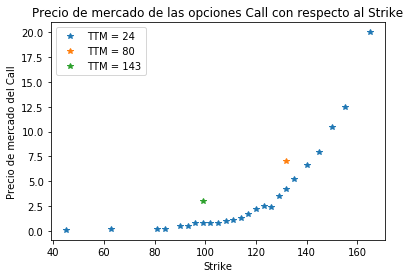

In [39]:

CP = "P"
for TTM in TTMs:
    Ks = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.TTM == TTM) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Last.values
    plt.plot(Ks, precios,'*', label='TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

In [40]:
Ks = list(set(panel_opciones_ggal_byma_limpio.Strike.values))

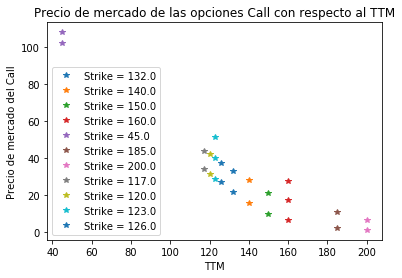

In [41]:

CP = "C"
for K in Ks:
    TTMs = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.Strike == K) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Strike.values
    precios = panel_opciones_ggal_byma_limpio[(panel_opciones_ggal_byma_limpio.Strike == K) & (panel_opciones_ggal_byma_limpio.CallPut == CP)].Last.values
    if len(TTMs)>1:
        plt.plot(TTMs, precios,'*', label='Strike = '+str(K))

plt.legend()

plt.xlabel('TTM')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al TTM')
    
plt.show()
    

## Pasar a Excel

In [42]:
panel_opciones_byma_crudo = web_scraping_opciones_rava()
panel_opciones_byma_crudo.to_excel('Clase_1_panel_opciones_byma_crudo.xls')

panel_acciones_byma = obtener_panel_acciones()
panel_acciones_byma.to_excel('Clase_1_panel_acciones.xls')

panel_opciones_byma = obtener_panel_opciones_byma('', False)
panel_opciones_byma.to_excel('Clase_1_panel_opciones_byma.xls')

panel_opciones_byma_limpio = obtener_panel_opciones_byma('', True)
panel_opciones_byma_limpio.to_excel('Clase_1_panel_opciones_byma_limpio.xls')